In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import random

import plotly.express as px

In [2]:
sns.set_style("whitegrid")
sns.despine()
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlesize=14, titlepad=10)

seed=42

<Figure size 640x480 with 0 Axes>

### Read Data

In [3]:
laptop = pd.read_csv('laptop_clean.csv')

laptop

,company,product,category,screen(inches),ram(GB),gpu,os,os_version,weight(kg),price,...,screentype,touchscreen,cpu_name,cpu_speed(GHz),cpu_brand,storage_1(GB),storage_2(GB),storage_1_type,storage_2_type,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Mac OS,Mac OS,1.37,11912523.48,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,2.3,Intel,128,0,SSD,NaN,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,Mac OS,Mac OS,1.34,7993374.48,...,NaN,0.0,Intel Core i5,1.8,Intel,128,0,Flash Storage,NaN,Intel
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,No OS,1.86,5112900.00,...,NaN,0.0,Intel Core i5 7200U,2.5,Intel,256,0,SSD,NaN,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,Mac OS,Mac OS,1.83,22563005.40,...,IPSPanelRetinaDisplay,0.0,Intel Core i7,2.7,Intel,512,0,SSD,NaN,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,Mac OS,Mac OS,1.37,16037611.20,...,IPSPanelRetinaDisplay,0.0,Intel Core i5,3.1,Intel,256,0,SSD,NaN,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972,Dell,Alienware 17,Gaming,17.3,32,Nvidia GeForce GTX 1070,Windows,Windows 10,4.42,24897600.00,...,NaN,0.0,Intel Core i7 6700HQ,2.6,Intel,256,1000,SSD,HDD,Nvidia
973,Toshiba,Tecra A40-C-1DF,Notebook,14.0,8,Intel HD Graphics 520,Windows,Windows 10,1.95,10492560.00,...,NaN,0.0,Intel Core i5 6200U,2.3,Intel,256,0,SSD,NaN,Intel
974,Asus,Rog Strix,Gaming,17.3,16,Nvidia GeForce GTX 1060,Windows,Windows 10,2.73,18227710.80,...,NaN,0.0,Intel Core i7 7700HQ,2.8,Intel,256,1000,SSD,HDD,Nvidia
975,HP,Probook 450,Notebook,15.6,8,Nvidia GeForce 930MX,Windows,Windows 10,2.04,8705268.00,...,IPSPanel,0.0,Intel Core i5 7200U,2.7,Intel,128,1000,SSD,HDD,Nvidia


### Menampilkan Info Dataset

In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977 entries, 0 to 976
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            977 non-null    object 
 1   product            977 non-null    object 
 2   category           977 non-null    object 
 3   screen(inches)     977 non-null    float64
 4   ram(GB)            977 non-null    int64  
 5   gpu                977 non-null    object 
 6   os                 977 non-null    object 
 7   os_version         977 non-null    object 
 8   weight(kg)         977 non-null    float64
 9   price              977 non-null    float64
 10  resolution(pixel)  977 non-null    object 
 11  screentype         280 non-null    object 
 12  touchscreen        977 non-null    float64
 13  cpu_name           977 non-null    object 
 14  cpu_speed(GHz)     977 non-null    float64
 15  cpu_brand          977 non-null    object 
 16  storage_1(GB)      977 non

#### Kolom Company/Perusahaan

In [5]:
print(laptop.company)
print("")
print(laptop.company.unique())
print("")
print(laptop.company.value_counts())

0        Apple
1        Apple
2           HP
3        Apple
4        Apple
        ...   
972       Dell
973    Toshiba
974       Asus
975         HP
976     Lenovo
Name: company, Length: 977, dtype: object

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']

Dell         232
Lenovo       226
HP           179
Asus         122
Acer          83
Toshiba       39
MSI           34
Apple         17
Samsung        8
Mediacom       7
Microsoft      6
Razer          5
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Vero           2
Fujitsu        2
Name: company, dtype: int64


##### Distribusi Laptop Berdasarkan Company/Perusahaan

**Menggunakan Matplotlib**

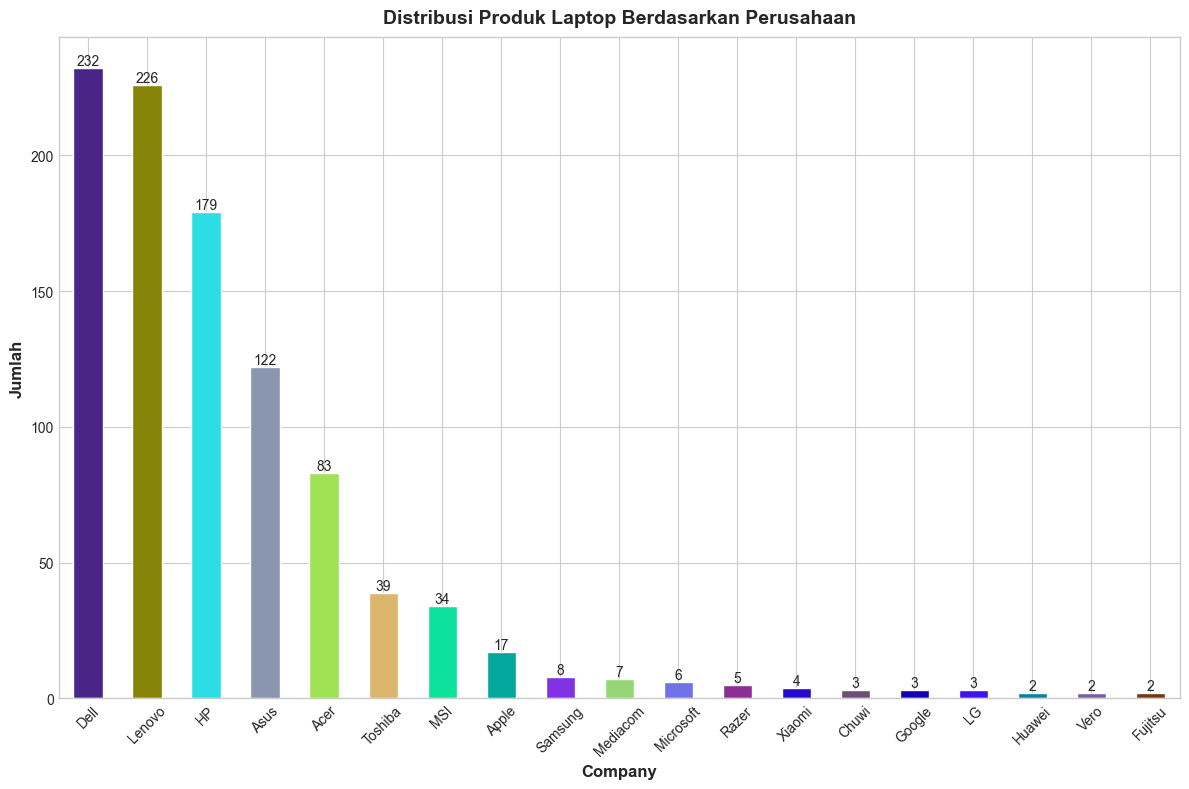

In [6]:
jumlah_company = laptop['company'].value_counts()

colors = ['#'+''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(len(jumlah_company))]

plt.figure(figsize=(12, 8))
ax = jumlah_company.plot(kind='bar', color = colors)
plt.title("Distribusi Produk Laptop Berdasarkan Perusahaan")
plt.xlabel('Company')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

**Menggunakan Ploly**

In [7]:
grouped_company = laptop.groupby('company').size().reset_index(name='counts')
grouped_company = grouped_company.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_company, x='company', y='counts', color='company', labels={'counts':'Jumlah Laptop'}, title="Jumlah Laptop berdasarkan Perusahaan")
fig.show()

##### Distribusi Laptop Berdasarkan Category Laptop

In [8]:
category = laptop.category
print(f"{category}\n\n{category.unique()}\n\n{category.value_counts()}")

0      Ultrabook
1      Ultrabook
2       Notebook
3      Ultrabook
4      Ultrabook
         ...    
972       Gaming
973     Notebook
974       Gaming
975     Notebook
976     Notebook
Name: category, Length: 977, dtype: object

['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']

Notebook              549
Ultrabook             152
Gaming                150
2 in 1 Convertible     85
Workstation            24
Netbook                17
Name: category, dtype: int64


**Menggunakan Matplotlib**

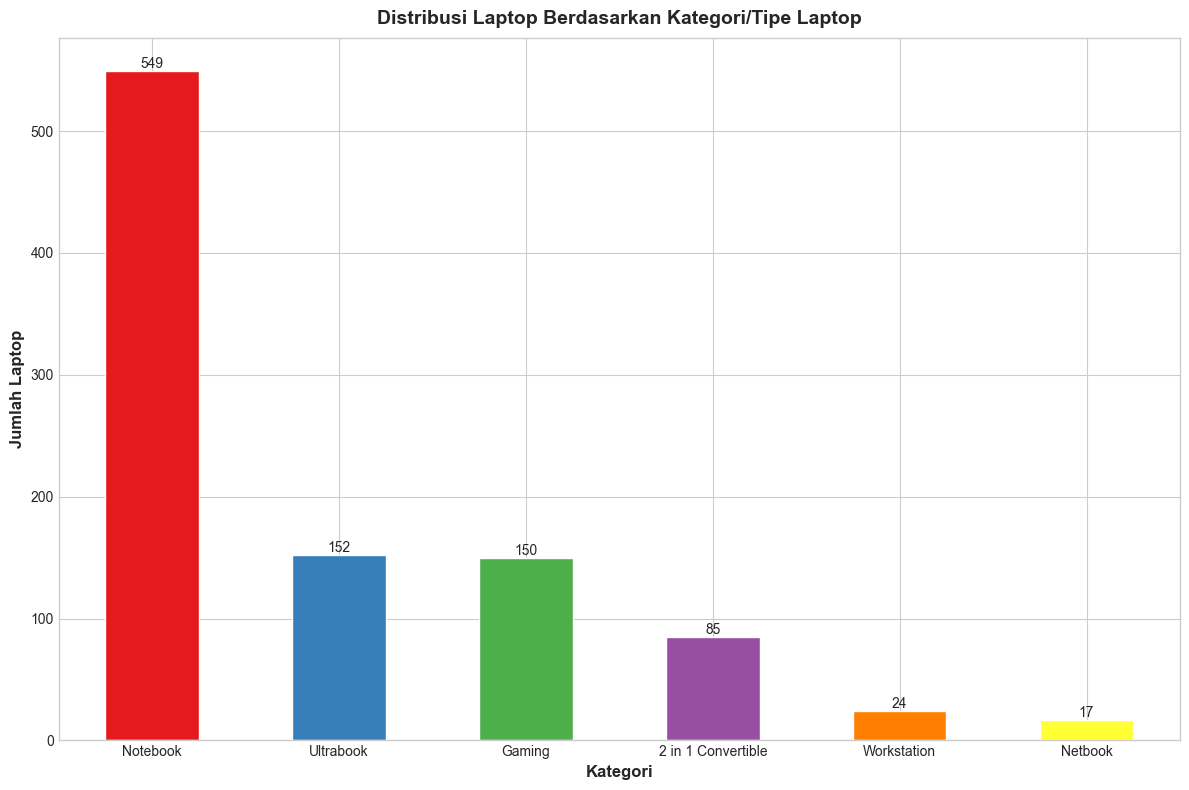

In [9]:
jumlah_kategori = laptop['category'].value_counts()

colors = sns.color_palette('Set1', len(jumlah_kategori))

plt.figure(figsize=(12, 8))
ax = jumlah_kategori.plot(kind='bar', color=colors)
plt.title('Distribusi Laptop Berdasarkan Kategori/Tipe Laptop')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Laptop')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

**Menggunakan Plotly**

In [10]:
grouped_kategori = laptop.groupby('category').size().reset_index(name='counts')
grouped_kategori = grouped_kategori.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_kategori, x = 'category', y = 'counts', color = 'category', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Kategori/Tipe Laptop")
fig.show()

##### Distribusi Laptop Berdasarkan Besar RAM (GB)

In [11]:
ram = laptop['ram(GB)']
print(f"{ram}\n\n{ram.unique()}\n\n{ram.value_counts()}")

0       8
1       8
2       8
3      16
4       8
       ..
972    32
973     8
974    16
975     8
976     4
Name: ram(GB), Length: 977, dtype: int64

[ 8 16  4  2 12  6 32 24]

8     483
4     271
16    149
6      24
12     21
32     16
2      10
24      3
Name: ram(GB), dtype: int64


**Menggunakan Matplotlib**

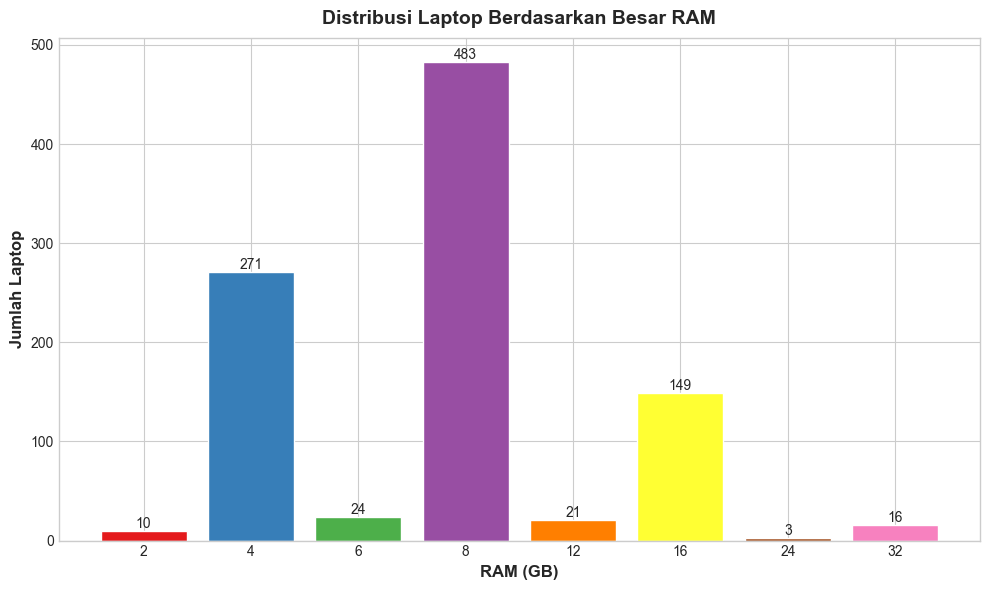

In [12]:
besar_ram = laptop['ram(GB)'].value_counts()
besar_ram = besar_ram.sort_index()

colors = sns.color_palette('Set1', len(besar_ram))

plt.figure(figsize=(10, 6))
plt.bar(range(len(besar_ram)), besar_ram.values, color=colors)
plt.title("Distribusi Laptop Berdasarkan Besar RAM")
plt.xlabel('RAM (GB)')
plt.ylabel('Jumlah Laptop')
plt.xticks(range(len(besar_ram)), besar_ram.index)
for i, v in enumerate(besar_ram.values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
plt.show()


**Menggunakan Plotly**

In [13]:
grouped_ram = laptop.groupby('ram(GB)').size().reset_index(name='counts')
grouped_ram['ram(GB)'] = grouped_ram['ram(GB)'].astype(str)

fig = px.bar(grouped_ram, x = 'ram(GB)', y = 'counts', color='ram(GB)', labels={'counts': "Jumlah Laptop"}, title="Jumlah Laptop Berdasarkan Besar RAM(GB) yang digunakan")

fig.show()

In [14]:
fig = px.histogram(laptop, x = 'ram(GB)', title="RAM Distribution", marginal = 'violin')
fig.show()

##### Kolom Screen/Ukuran Layar(Inch)

In [15]:
screen = laptop['screen(inches)']
print(f"{screen}\n\n{screen.unique()}\n\n{screen.value_counts()}")

0      13.3
1      13.3
2      15.6
3      15.4
4      13.3
       ... 
972    17.3
973    14.0
974    17.3
975    15.6
976    14.0
Name: screen(inches), Length: 977, dtype: float64

[13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]

15.6    494
14.0    146
17.3    131
13.3    123
11.6     27
12.5     23
13.5      6
13.9      6
15.4      4
12.3      4
12.0      3
15.0      3
13.0      2
10.1      1
18.4      1
17.0      1
14.1      1
11.3      1
Name: screen(inches), dtype: int64


**Menggunakan Matplotlib**

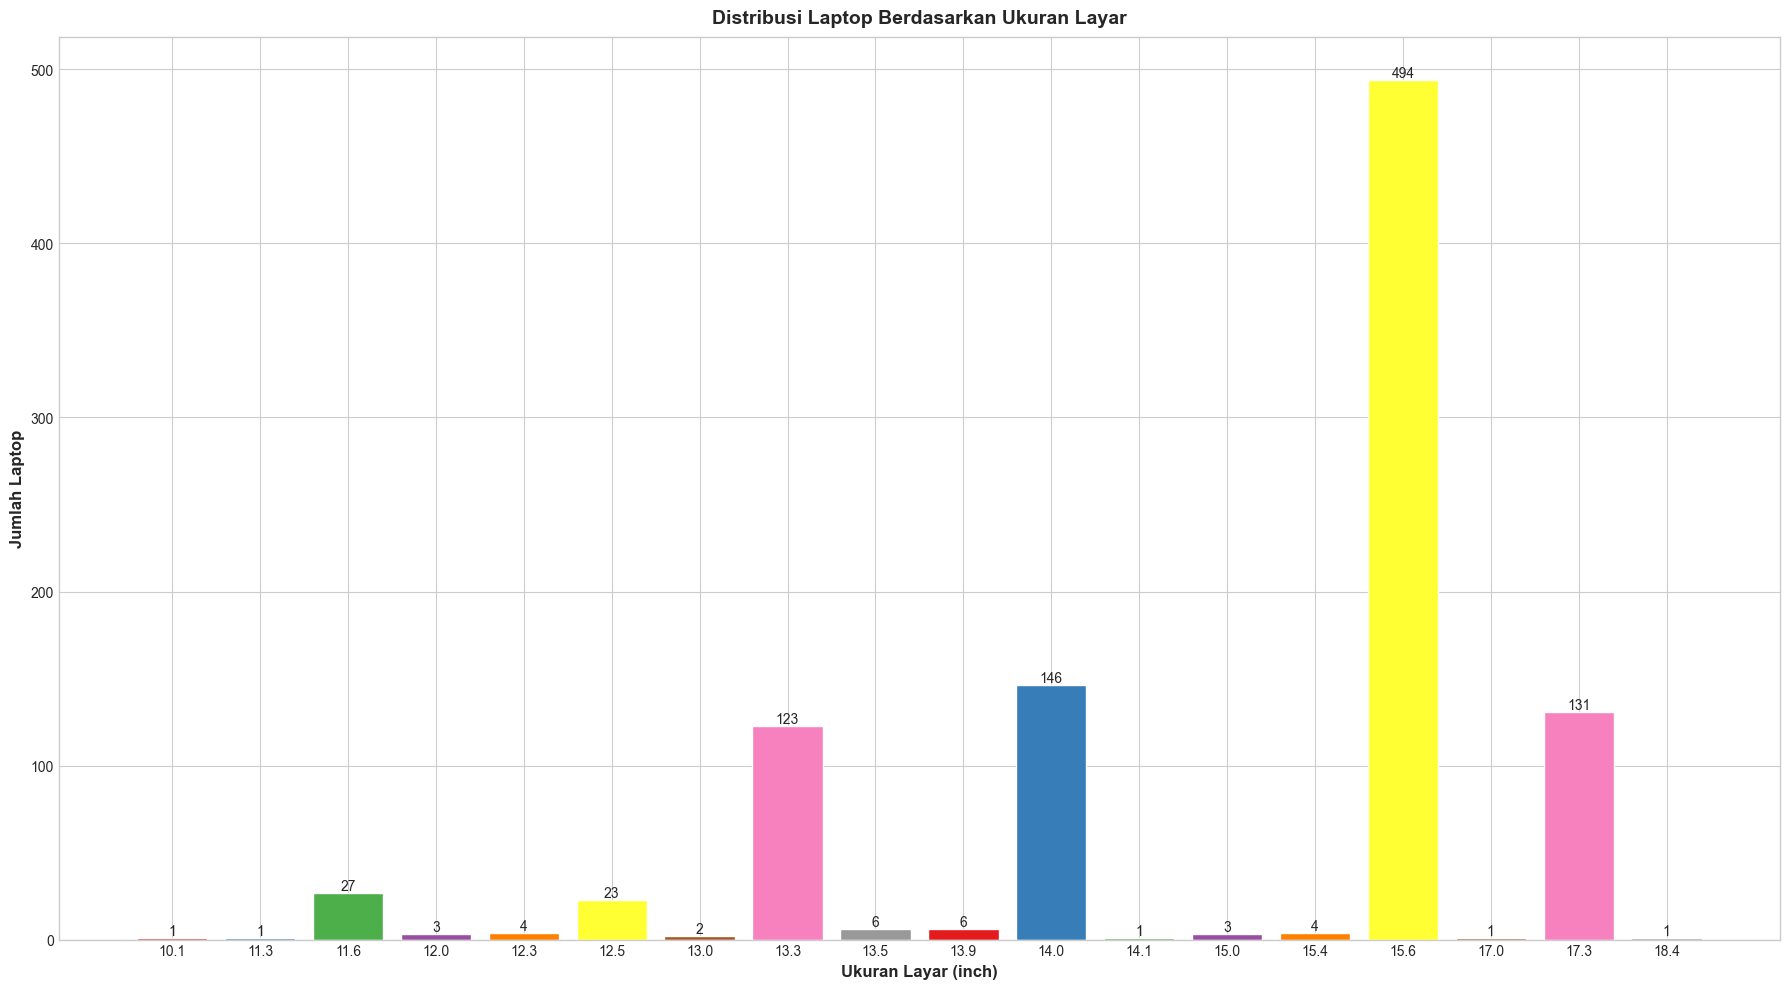

In [16]:
jumlah_screen = laptop['screen(inches)'].astype(str).value_counts()
jumlah_screen = jumlah_screen.sort_index()

colors = sns.color_palette('Set1', len(jumlah_screen))

plt.figure(figsize=(18, 10))
plt.bar(jumlah_screen.index, jumlah_screen.values, color = colors)
plt.title("Distribusi Laptop Berdasarkan Ukuran Layar")
plt.xlabel('Ukuran Layar (inch)')
plt.ylabel('Jumlah Laptop')
for i, v in enumerate(jumlah_screen.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

**Menggunakan Plotly**

In [17]:
grouped_screen = laptop.groupby('screen(inches)').size().reset_index(name='counts')
grouped_screen['screen(inches)'] = grouped_screen['screen(inches)'].astype(str)

fig = px.bar(grouped_screen, x = 'screen(inches)', y = 'counts', color = 'screen(inches)', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Ukuran Layar (Pixel) yang digunakan")

fig.show()

##### Kolom GPU

In [18]:
gpu_list = laptop['gpu'].value_counts()[:10].index.tolist()

data = laptop.copy()
data = data[data['gpu'].isin(gpu_list)]

grouped_gpu = data.groupby('gpu').size().reset_index(name='counts')

grouped_gpu = grouped_gpu.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_gpu, x='gpu', y='counts', color='gpu', labels={'counts':'Jumlah Laptop'}, title="TOP 10 Common GPUs")
fig.show()

*GPU Name*

**Menggunakan Matplotlib**

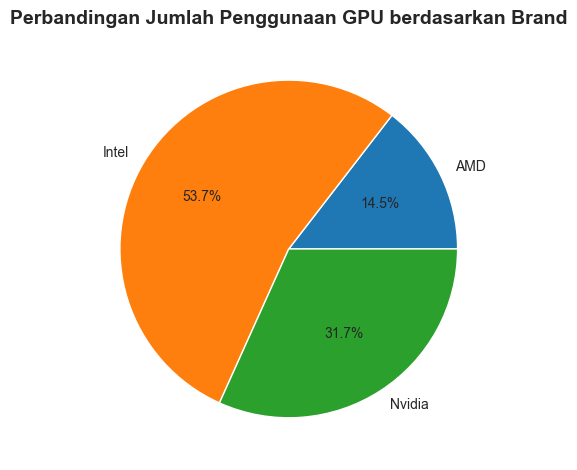

In [19]:
import matplotlib.pyplot as plt

gpu_brand = laptop.groupby(['gpu_brand']).size().reset_index(name='counts')

plt.pie(gpu_brand['counts'], labels=gpu_brand['gpu_brand'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Penggunaan GPU berdasarkan Brand')
plt.show()

**Menggunakan Pyplot**

In [20]:
fig = px.pie(gpu_brand, names = 'gpu_brand', values = 'counts', labels = {'counts': 'Jumlah Laptop'}, title = 'Perbandingan Jumlah Penggunaan GPU berdasarkan Brand')

fig.show()

##### Kolom Sistem Operasi

**Menggunakan Matplotlib**

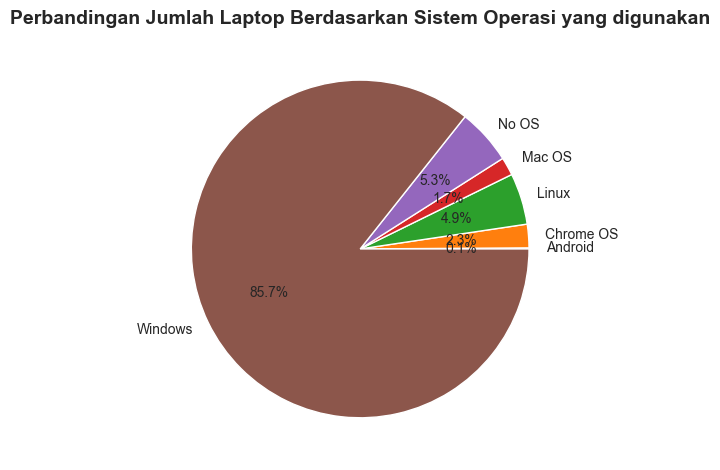

In [21]:
grouped_os = laptop.groupby('os').size().reset_index(name = 'counts')

plt.pie(grouped_os['counts'], labels=grouped_os['os'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Laptop Berdasarkan Sistem Operasi yang digunakan')
plt.show()

**Menggunakan Plotly**

In [22]:
fig = px.pie(grouped_os, values = 'counts', names = 'os', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasarkan Sistem Operasinya')
fig.show()

##### Kolom Versi Sistem Operasi

In [23]:
grouped_os_version = laptop.groupby(['os_version', 'os']).size().reset_index(name= 'counts')

fig = px.bar(grouped_os_version, x = 'os', y = 'counts', color = 'os_version', labels = {'counts': 'Jumlah Laptop'}, title= 'Jumlah Laptop Berdasarkan Versi Sistem Operasinya')
fig.update_layout(width = 2400, height = 1000)
fig.show()

##### Kolom Berat (Kg)

**Menggunakan Seaborn dan Matplotlib**

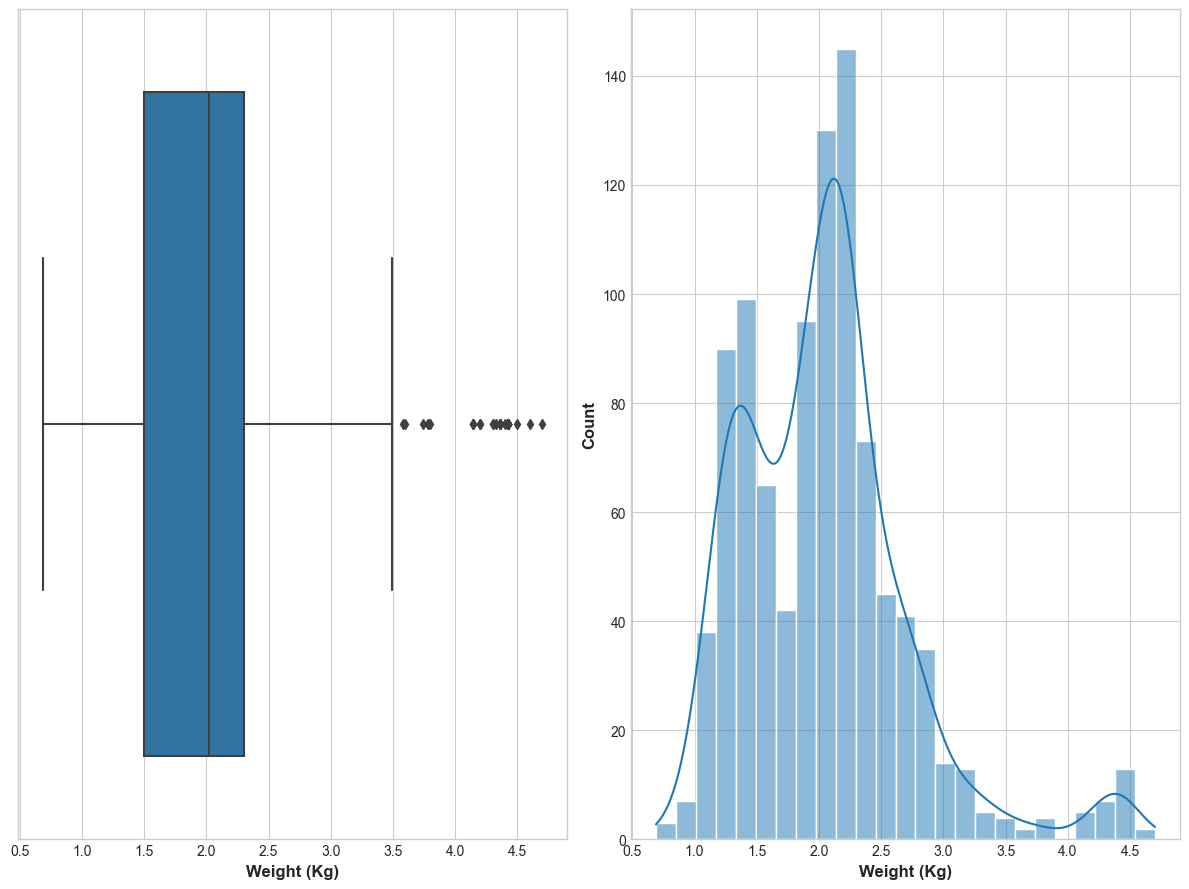

In [24]:
fig, (ax_box, ax_hist) = plt.subplots(1, 2, figsize=(12, 9))

sns.boxplot(data=laptop, x = 'weight(kg)', ax = ax_box)
ax_box.set_xlabel('Weight (Kg)')

sns.histplot(data=laptop, x = 'weight(kg)', ax = ax_hist, kde=True)
ax_hist.set_xlabel('Weight (Kg)')

plt.tight_layout()
plt.show()

**Menggunakan Plotly**

In [25]:
fig = px.histogram(laptop, x = 'weight(kg)', title='Distribusi Laptop Berdasarkan Berat (KG)', marginal='box', color_discrete_sequence=['#FFA500'])
fig.show()

##### Kolom Resolusi Layar (Pixel)

**Menggunakan Matplotlib**

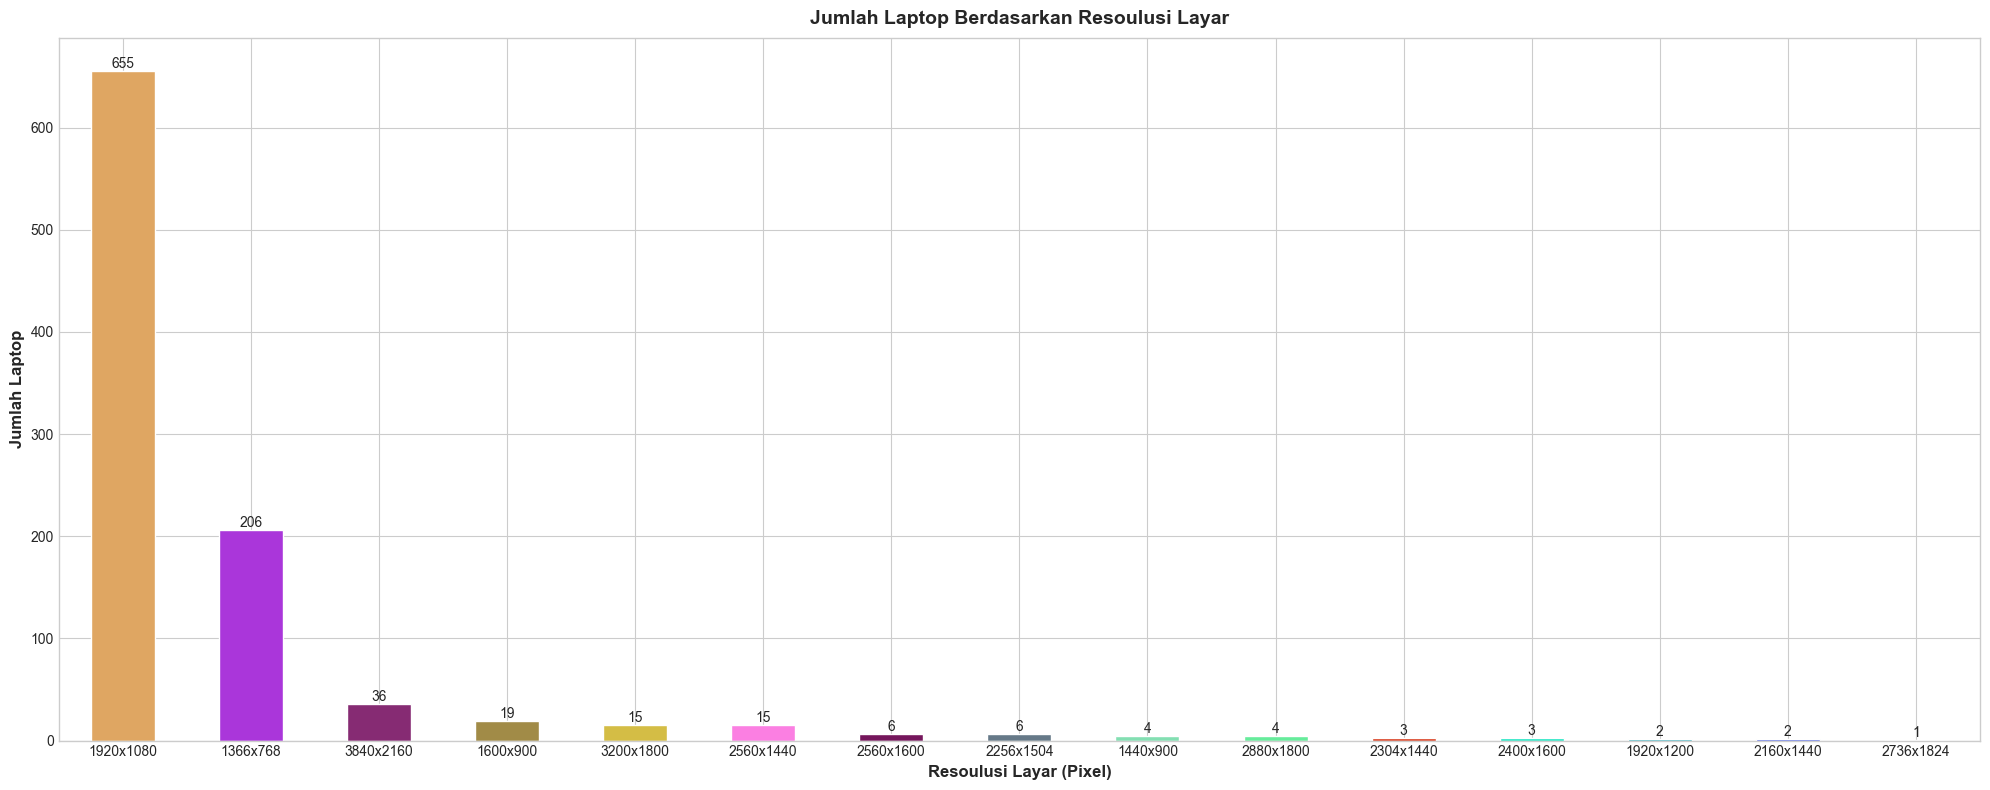

In [26]:
resolusi = laptop['resolution(pixel)'].value_counts()

colors = ['#' + ''.join(random.choices('123456789ABCDEF', k = 6)) for _ in range(len(resolusi))]

plt.figure(figsize=(20,  8))
ax = resolusi.plot(kind = 'bar', color = colors)
plt.title("Jumlah Laptop Berdasarkan Resoulusi Layar")
plt.xlabel('Resoulusi Layar (Pixel)')
plt.ylabel('Jumlah Laptop')
plt.xticks(rotation = 0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')

plt.show()

**Menggunakan Pyplot**

In [27]:
grouped_resolusi = laptop.groupby(['resolution(pixel)']).size().reset_index(name = 'counts')
grouped_resolusi = grouped_resolusi.sort_values(by='counts', ascending=False)

fig = px.bar(grouped_resolusi, x = 'resolution(pixel)', y = 'counts', color = 'resolution(pixel)', labels={'counts': 'Jumlah Laptop'}, title= 'Jumlah Laptop Berdasarkan Resolusi (pixel)')

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Kolom Screentype

**Menggunakan Matplotlib**

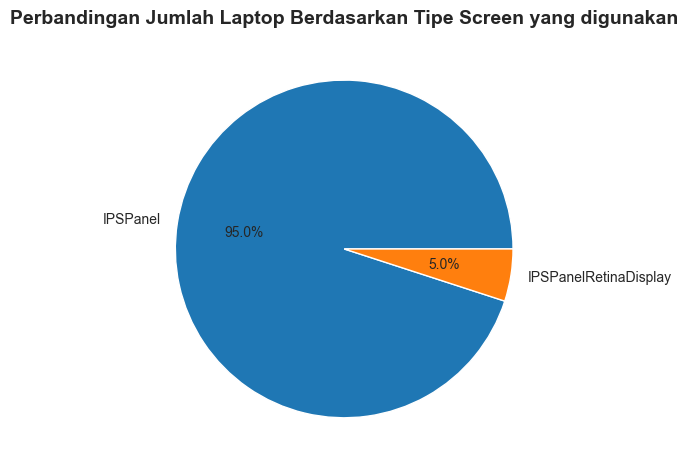

In [28]:
grouped_screentype = laptop.groupby('screentype').size().reset_index(name = 'counts')

plt.pie(grouped_screentype['counts'], labels=grouped_screentype['screentype'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Laptop Berdasarkan Tipe Screen yang digunakan')
plt.show()

**Menggunakan Pyplot**

In [29]:
fig = px.pie(grouped_screentype, values = 'counts', names = 'screentype', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Perbandingan Persentase Laptop Berdasarkan Tipe Screen')

fig.show()

##### Kolom Touchscreen

In [30]:
laptop['touchscreen'] = laptop['touchscreen'].astype(str)

laptop['touchscreen'] = laptop['touchscreen'].str.replace('0.0', "No Touchscreen")
laptop['touchscreen'] = laptop['touchscreen'].str.replace('1.0', 'Touchscreen')

laptop['touchscreen'].unique()

array(['No Touchscreen', 'Touchscreen'], dtype=object)

**Menggunakan Matplotlib**

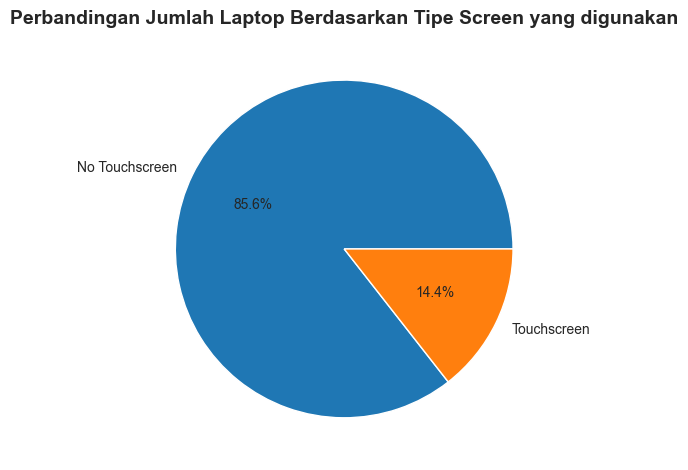

In [31]:
touchscreen = laptop.groupby('touchscreen').size().reset_index(name="counts")

plt.pie(touchscreen['counts'], labels=touchscreen['touchscreen'], autopct='%1.1f%%')
plt.title('Perbandingan Jumlah Laptop Berdasarkan Tipe Screen yang digunakan')
plt.show()

**Menggunakan Plotly**

In [32]:
fig = px.pie(touchscreen, values = 'counts', names='touchscreen', labels={'counts': 'Jumlah Laptop'}, title="Perbandingan Laptop dengan Toouchscrren dan Tanpa Touchscreen")

fig.show()

##### Kolom CPU

*TOP 10 CPU*

In [33]:
cpu_list = laptop['cpu_name'].value_counts()[:10].index.tolist()

data = laptop.copy()
data = data[data['cpu_name'].isin(cpu_list)]

# Group data by company column
grouped = data.groupby('cpu_name').size().reset_index(name='counts')

# Sort data in descending order based on counts
grouped = grouped.sort_values(by='counts', ascending=False)

# Create a bar chart using the plotly.express function
fig = px.bar(grouped, x='cpu_name', y='counts', color='cpu_name', labels={'counts':'Jumlah Laptop'}, title="TOP 10 Common CPUs")
fig.show()

*CPU Speed(GHz)*

**Menggunakan Plotly**

In [34]:
cpu_speed = laptop.groupby('cpu_speed(GHz)').size().reset_index(name='counts')
cpu_speed['cpu_speed(GHz)'] = cpu_speed['cpu_speed(GHz)'].astype(str)

fig = px.bar(cpu_speed, x = 'cpu_speed(GHz)', y = 'counts', color = 'cpu_speed(GHz)', labels = {'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasaarkan Kecepatan CPU (GHz)', barmode = 'stack')

fig.update_layout(
    width = 1200,
    height = 500,
    xaxis = dict(
        tickmode = 'array',
        tickvals = cpu_speed['cpu_speed(GHz)'].unique(),
        ticktext = cpu_speed['cpu_speed(GHz)'].unique()
    )
)

fig.show()

In [35]:
fig = px.histogram (laptop, x = 'cpu_speed(GHz)', title = 'Distribusi Laptop Berdasarkan Kecepatan CPU (GHz)', marginal = 'box', color_discrete_sequence = ['#FF1050'])
fig.show()

*CPU Brand*

In [36]:
cpu_brand = laptop.groupby('cpu_brand').size().reset_index(name='counts')

fig = px.pie(cpu_brand, values = "counts", names = 'cpu_brand', color = 'cpu_brand', labels = {'counts': 'Jumlah Laptop'}, title = 'Perbandingan Jumlah Laptop Berdasarkan Brand CPU', color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

##### Storage 1 (Utama)

*Kapasitas Storage*

**Menggunakan Plotly**

In [37]:
grouped_storage_1 = laptop.groupby('storage_1(GB)').size().reset_index(name='counts')
grouped_storage_1['storage_1(GB)'] = grouped_storage_1['storage_1(GB)'].astype(str)

fig = px.bar(grouped_storage_1, x = 'storage_1(GB)', y = 'counts', color = 'storage_1(GB)', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Storage Utama")

fig.update_layout(
    width = 2400,
    height = 1000
)

fig.show()

In [38]:
fig = px.histogram(grouped_storage_1, x = 'storage_1(GB)', y = 'counts', title = "First Storage Distributin (GB)", marginal = 'box')
fig.show()

*Tipe Storage Utama*

In [39]:
laptop['storage_1_type'].unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

In [40]:
laptop['storage_1_type'] = laptop['storage_1_type'].replace({'SSD  ': 'SSD', 'HDD  ': 'HDD', 'Flash Storage  ': 'Flash Storage'})

In [41]:
grouped_storage_1_type = laptop.groupby('storage_1_type').size().reset_index(name='counts')

fig = px.pie(grouped_storage_1_type, names = 'storage_1_type', values = 'counts', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasarkan Tipe Storage yang digunakan')

fig.show()

##### Storage 2 (Tambahan)

*Kapasistas Storage Tambahan*

In [42]:
grouped_storage_2 = laptop.groupby('storage_2(GB)').size().reset_index(name='counts')
grouped_storage_2['storage_2(GB)'] = grouped_storage_2['storage_2(GB)'].astype(str)

fig = px.bar(grouped_storage_2, x = 'storage_2(GB)', y = 'counts', color = 'storage_2(GB)', labels={'counts': 'Jumlah Laptop'}, title="Jumlah Laptop Berdasarkan Storage Tambahan")

fig.update_layout(
    width = 2400,
    height = 1000
)

fig.show()

*Persentase Perbandingan Laptop dengan Storage Tambahan dan tampa storage tambahan*

In [43]:
storage_counts = laptop['storage_2(GB)'].value_counts()

labels = ['Tidak menggunakan Storage 2', 'Menggunakan Storage 2']
values = [storage_counts.get(0.0, 0), storage_counts.sum() - storage_counts.get(0.0, 0)]

fig = px.pie(values=values, names=labels, title='Perbandingan Jumlah Laptop Penggunaan Storage 2')

fig.show()

*Persentase Perbandingan Tipe Storage Tambahan yang digunakan*

In [44]:
grouped_storage_2_type = laptop.groupby('storage_2_type').size().reset_index(name='counts')

fig = px.pie(grouped_storage_2_type, names = 'storage_2_type', values = 'counts', labels={'counts': 'Jumlah Laptop'}, title='Jumlah Laptop Berdasarkan Tipe Storage 2 yang digunakan')

fig.show()

##### Korelasi Antara RAM(GB) dan Harga

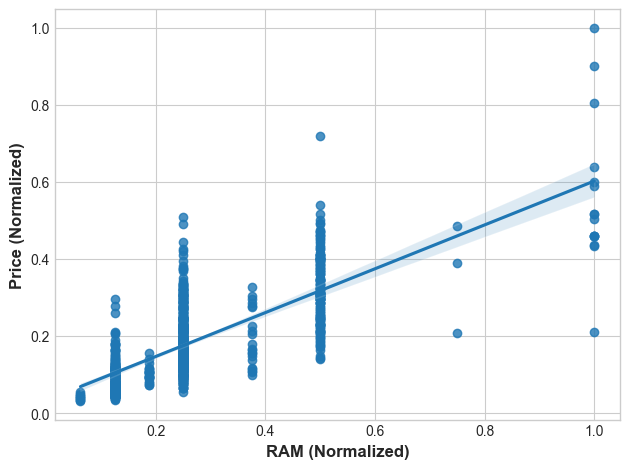

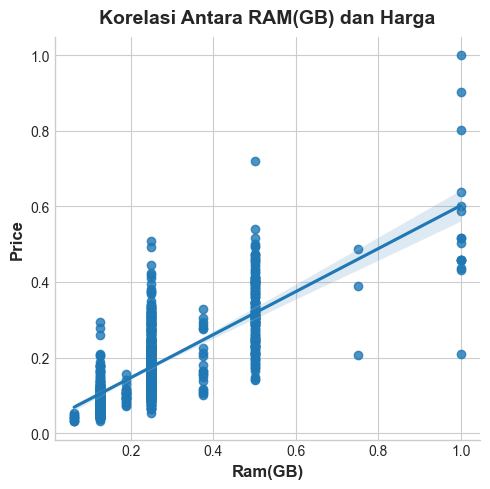

In [45]:
price_normalized = laptop['price'] / laptop['price'].max()
ram_normalized = laptop['ram(GB)'] / laptop['ram(GB)'].max()

data = pd.DataFrame({'RAM (Normalized)': ram_normalized, 'Price (Normalized)': price_normalized})

sns.regplot(data = data, x='RAM (Normalized)', y='Price (Normalized)')
sns.lmplot(data = data, x='RAM (Normalized)', y='Price (Normalized)')

plt.title("Korelasi Antara RAM(GB) dan Harga")
plt.xlabel('Ram(GB)')
plt.ylabel('Price')
plt.show()

In [46]:
laptop['price_normalized'] = laptop['price'] / laptop['price'].max()

In [47]:
price_normalized = laptop['price'] / laptop['price'].max()
ram_normalized = laptop['ram(GB)'] / laptop['ram(GB)'].max()

fig = px.scatter(data_frame=data, x='RAM (Normalized)', y='Price (Normalized)', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi RAM(GB) dan Price',
                  xaxis_title='RAM (Normalized)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara CPU Speed(GHz) dan Harga

In [48]:
fig = px.scatter(data_frame=laptop, x='cpu_speed(GHz)', y='price_normalized', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi CPU Speed (GHz) dan Price',
                  xaxis_title='CPU Speed (GHz)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara Ukuran Layar(inches) dan Harga

In [49]:
fig = px.scatter(data_frame=laptop, x='screen(inches)', y='price_normalized', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi Screen (Pixel) dan Price',
                  xaxis_title='Screen (pixel)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara Ukuran weight(Kg) dan Harga

In [50]:
fig = px.scatter(data_frame=laptop, x='weight(kg)', y='price_normalized', trendline='ols')

fig.update_layout(title='Scatter Plot with Trendline: Korelasi weigth (kg) dan Price',
                  xaxis_title='weigth (kg)',
                  yaxis_title='Price (Normalized)')
fig.show()

##### Korelasi Antara Ukuran Ukuran Layar dan Berat Laptop

In [51]:
fig = px.scatter(data_frame = laptop, x = 'screen(inches)', y = 'weight(kg)', trendline = 'ols')

fig.update_layout(title = 'Scatter Plot with Trendline: Korelasi Antara Berat dengan Ukuran Layar',
                  xaxis_title = 'Screen Laptop (inches)',
                  yaxis_title = 'Berat Laptop (Kg)')

fig.show()

##### Perbandingan kategori produk dengan jumlah masing-masing kategori laptop

In [52]:
grouped_company_category = laptop.groupby(['company', 'category']).size().reset_index(name='counts')

fig = px.bar(grouped_company_category, x='company', y='counts', color='category', labels={'counts':'Jumlah Laptop'}, title="Jumlah Laptop berdasarkan Perusahaan dan Kategori", barmode='stack')
fig.update_layout(width=1600, height=1000)
fig.show()

##### Distribusi Harga Laptop

In [53]:
fig = px.histogram(laptop, x = 'price', title = "Price Distribution", marginal = 'rug')

fig.show()

##### Rata-rata Berat Laptop berdasarkan Kategori Produk

In [54]:
fig = px.box(laptop, x='category', y='weight(kg)', color = "category", title="Rata-rata Berat Laptop berdasarkan Kategori Produk")

fig.show()

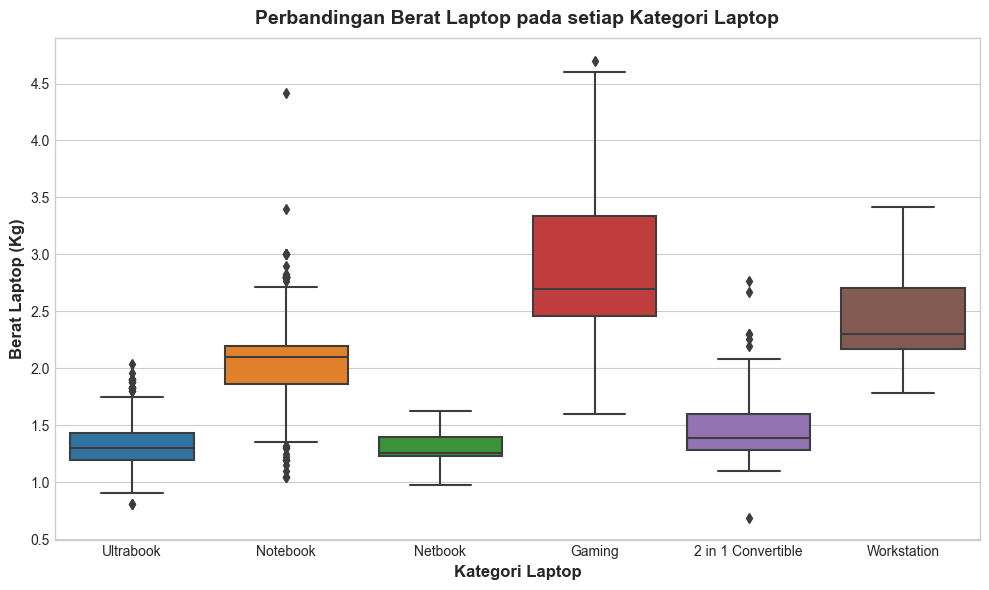

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='weight(kg)')
plt.title('Perbandingan Berat Laptop pada setiap Kategori Laptop')
plt.xlabel('Kategori Laptop')
plt.ylabel('Berat Laptop (Kg)')

plt.show()

##### Perbandingan besar RAM(GB) berdasarkan Kategori Laptop

In [56]:
grouped_ram_category = laptop.groupby(['ram(GB)', 'category']).size().reset_index(name='counts')
grouped_ram_category['ram(GB)'] = grouped_ram_category['ram(GB)'].astype(str)

fig = px.bar(grouped_ram_category, x='ram(GB)', y='counts', color='category', labels={'counts':'Jumlah Laptop'}, title="Jumlah Laptop berdasarkan RAM (GB) dan Kategori", barmode='stack')

fig.update_layout(
    width=2400,
    height=1000,
    xaxis=dict(
        tickmode='array',
        tickvals=grouped_ram_category['ram(GB)'].unique(),
        ticktext=grouped_ram_category['ram(GB)'].unique()
    )
)

fig.show()

##### Boxplot Perbandingan Kecepatan CPU antar merek CPU

In [57]:
fig = px.box(laptop, x = 'cpu_brand', y = 'cpu_speed(GHz)', color = "cpu_brand", title = "Perbandingan Kecepatan CPU antar Brand")

fig.show()

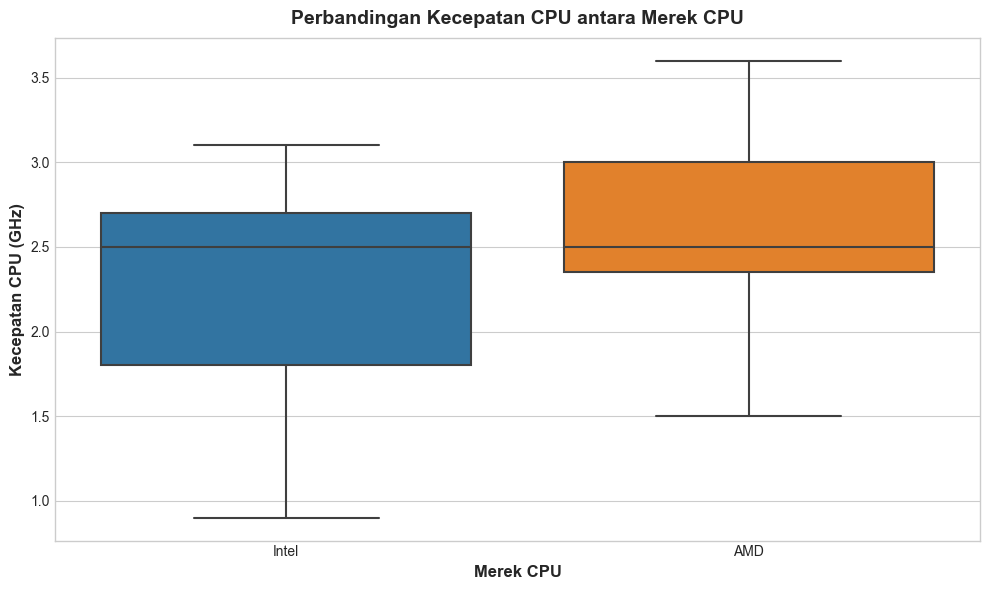

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='cpu_brand', y='cpu_speed(GHz)')
plt.title('Perbandingan Kecepatan CPU antara Merek CPU')
plt.xlabel('Merek CPU')
plt.ylabel('Kecepatan CPU (GHz)')

plt.show()

##### Perbandingan Kategori Produk dengan Harga Laptop (Normalized)

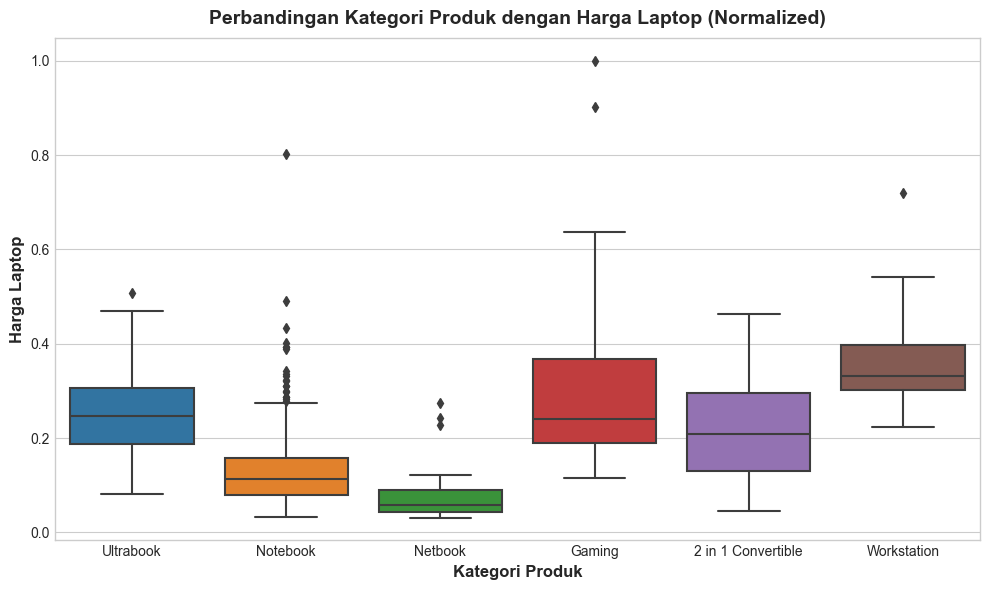

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='price_normalized')

# Menambahkan label pada sumbu x dan y
plt.xlabel('Kategori Produk')
plt.ylabel('Harga Laptop')
plt.title('Perbandingan Kategori Produk dengan Harga Laptop (Normalized)')

plt.show()

##### Distribusi Laptop Berdasarkan Berat(Kg) dan besar RAM(GB)

In [60]:
grouped_ram_berat = laptop.groupby(['weight(kg)', 'ram(GB)']).size().reset_index(name = 'counts')

fig = px.histogram(grouped_ram_berat, x='weight(kg)', y = 'counts', color='ram(GB)', labels = {'counts': 'Jumlah Laptop'}, nbins=30, barmode='overlay')

fig.update_layout(
    title='Distribusi Berat Laptop Berdasarkan RAM',
    xaxis_title='Berat (kg)',
    yaxis_title='Jumlah Laptop',
)

fig.show()

<Figure size 1200x800 with 0 Axes>

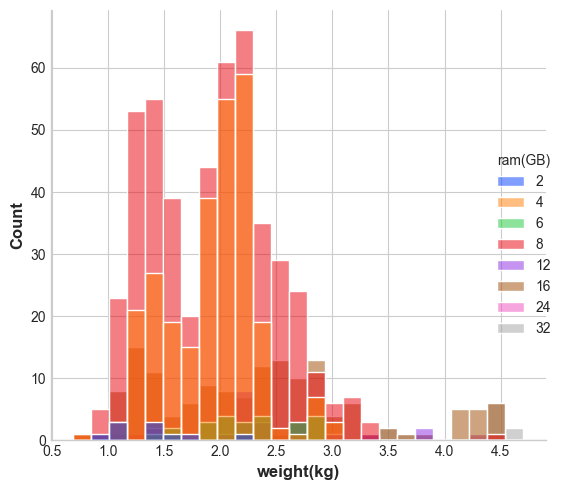

In [61]:
plt.figure(figsize=(12, 8))
sns.displot(data=laptop, x = 'weight(kg)', hue = 'ram(GB)', palette='bright')

plt.show()

##### Perbandingan Jumlah Laptop Berdasarkan Company/Perusahaan dan Sistem Operasi yang digunakannya

In [62]:
grouped_company_os = laptop.groupby(['company', 'os']).size().reset_index(name = 'counts')

fig = px.bar(grouped_company_os, x = 'company', y = 'counts', color = 'os', labels = {'counst': 'Jumlah Laptop'}, title = 'Jumlah Laptop Berdasarkan Company dan Sistem Operasinya')
fig.update_layout(width = 1600, height = 1000)
fig.show()

##### Pemetaan Jumlah Laptop Berdasarkan Kategori Laptop dan OS

In [63]:
grouped_category_os = laptop.groupby(['category', 'os']).size().reset_index(name = 'counts')

fig = px.bar(grouped_category_os, x = 'category', y = 'counts', color = 'os', labels = {'counst': 'Jumlah Laptop'}, title = 'Jumlah Laptop Berdasarkan category dan Sistem Operasinya')
fig.update_layout(width = 1600, height = 1000)
fig.show()

##### Perbandingan Jumlah Laptop Berdasarkan Resolusi dan Kategori Produk

In [64]:
grouped_resolusi = laptop.groupby(['resolution(pixel)', 'category']).size().reset_index(name = 'counts')

fig = px.bar(grouped_resolusi, x = 'resolution(pixel)', y = 'counts', color = 'category', labels={'counts': 'Jumlah Laptop'}, title= 'Jumlah Laptop Berdasarkan Resolusi')

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan Company

In [65]:
grouped_touchscreen_company = laptop.groupby(['touchscreen', 'company']).size().reset_index(name='counts')

fig = px.bar(grouped_touchscreen_company, x = 'company', y = 'counts', color = 'touchscreen', labels={'counts': 'Jumlah Laptop'}, title='Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan Company', color_discrete_map={0: 'red', 1: 'blue'})

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan Kategori Laptop

In [66]:
grouped_touchscreen_category = laptop.groupby(['touchscreen', 'category']).size().reset_index(name='counts')

fig = px.bar(grouped_touchscreen_category, x = 'category', y = 'counts', color = 'touchscreen', labels={'counts': 'Jumlah Laptop'}, title='Perbandingan Laptop dengan dan tanpa Touchscrren berdasarkan category')

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Produk Laptop dengan Merek CPU yang digunakan

In [67]:
grouped_cpubrand_company = laptop.groupby(['cpu_brand', 'company']).size().reset_index(name = 'counts')

fig = px.bar(grouped_cpubrand_company, x = 'company', y = 'counts', color = 'cpu_brand', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Kategori Laptop dan CPU yang digunakan', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(width = 2400, height = 1000)

fig.show()

##### Perbandingan Kategori Laptop dengan Merek CPU yang digunakan

In [68]:
grouped_cpubrand_category = laptop.groupby(['cpu_brand', 'category']).size().reset_index(name = 'counts')

fig = px.bar(grouped_cpubrand_category, x = 'category', y = 'counts', color = 'cpu_brand', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Kategori Laptop dan CPU yang digunakan', color_discrete_sequence=["red", "blue",])

fig.update_layout(width = 2400, height = 1000)

fig.show()

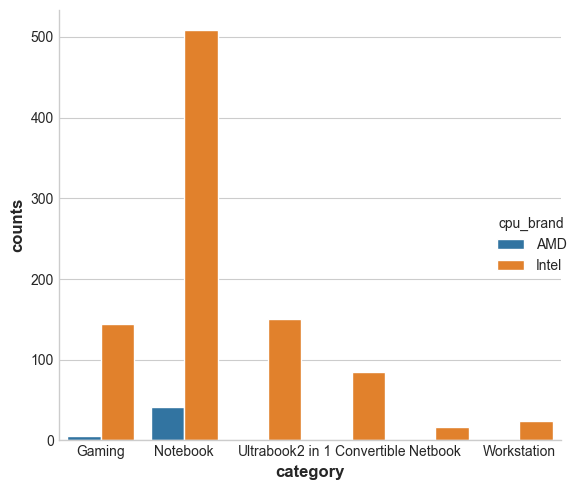

In [69]:
sns.catplot(data=grouped_cpubrand_category, x="category", y="counts", hue="cpu_brand", kind="bar")

##### Perbandinngan Jumlah Laptop Berdasarkan Kategori Laptop dan GPU yang digunakan

In [70]:
grouped_gpu_category = laptop.groupby(['gpu_brand', 'category']).size().reset_index(name = 'counts')

fig = px.bar(grouped_gpu_category, x = 'category', y = 'counts', color = 'gpu_brand', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Kategori Laptop dan GPU yang digunakan', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(width = 2400, height = 1000)

fig.show()

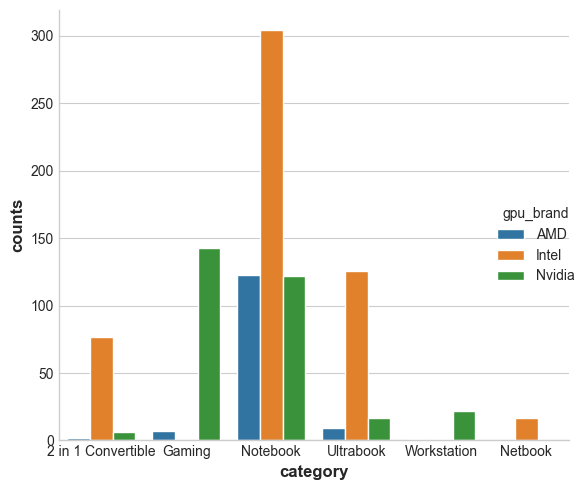

In [71]:
sns.catplot(data=grouped_gpu_category, x="category", y="counts", hue="gpu_brand", kind="bar")

##### Perbandinngan Jumlah Laptop Berdasarkan Perusahan Laptop dan GPU yang digunakan

In [72]:
grouped_gpu_company = laptop.groupby(['gpu_brand', 'company']).size().reset_index(name = 'counts')

fig = px.bar(grouped_gpu_company, x = 'company', y = 'counts', color = 'gpu_brand', labels = {'cpu_brand': 'Jumlah Laptop'}, title = 'Produk Laptop dan GPU yang digunakan', color_discrete_sequence=px.colors.qualitative.Dark24)

fig.update_layout(width = 2400, height = 1000)

fig.show()

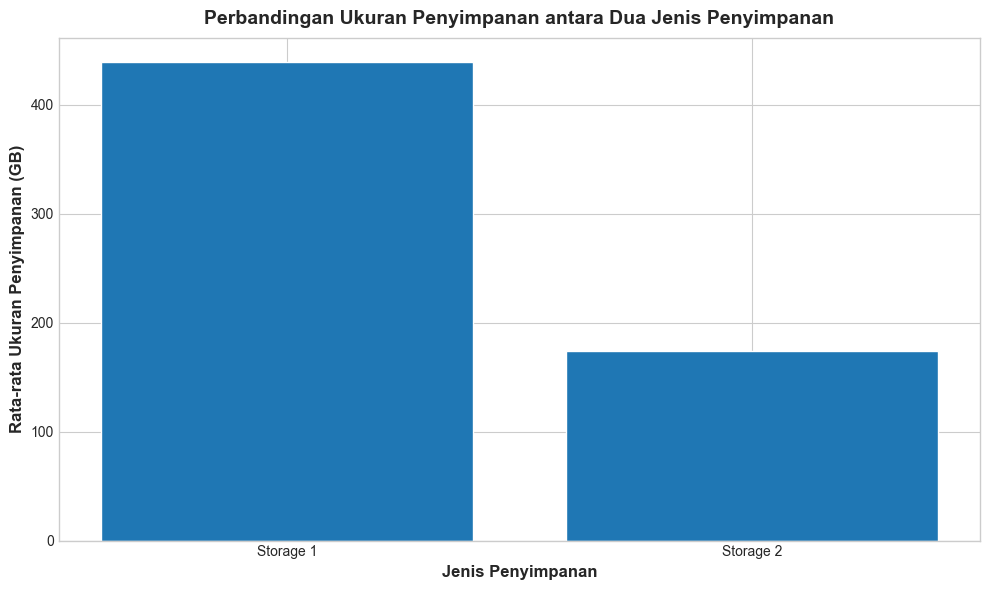

In [73]:
# Menghitung rata-rata ukuran penyimpanan untuk setiap jenis penyimpanan
storage1_mean = laptop['storage_1(GB)'].mean()
storage2_mean = laptop['storage_2(GB)'].mean()

# Membuat bar plot
plt.figure(figsize=(10, 6))
plt.bar(['Storage 1', 'Storage 2'], [storage1_mean, storage2_mean])
plt.title('Perbandingan Ukuran Penyimpanan antara Dua Jenis Penyimpanan')
plt.xlabel('Jenis Penyimpanan')
plt.ylabel('Rata-rata Ukuran Penyimpanan (GB)')

plt.show()

##### Hubungan antara Kategori Laptop dengan RAM

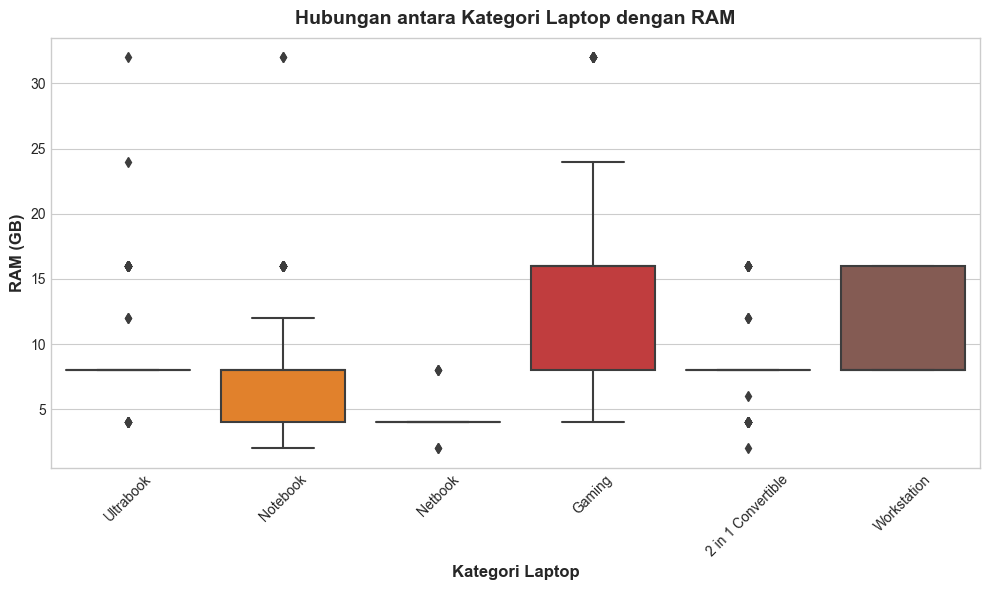

In [74]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=laptop, x='category', y='ram(GB)')
plt.title('Hubungan antara Kategori Laptop dengan RAM')
plt.xlabel('Kategori Laptop')
plt.ylabel('RAM (GB)')
plt.xticks(rotation=45)

plt.show()

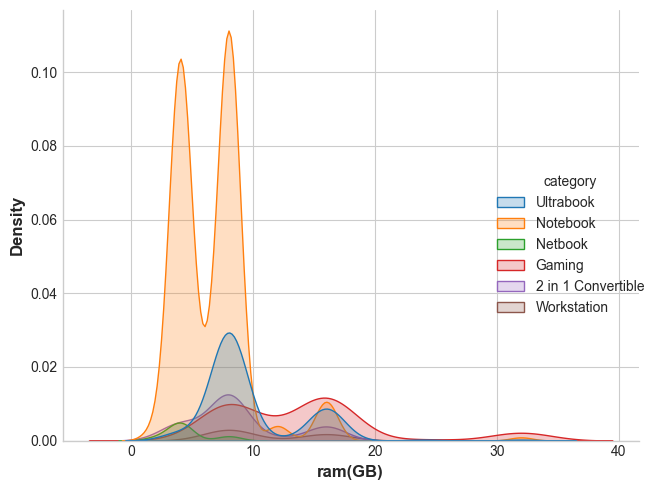

In [75]:
sns.displot(laptop, x = "ram(GB)", kind="kde", hue = "category", fill = True)

##### Distribusi Harga Laptop Berdasarkan CPU dan GPU yang digunakan

In [76]:
fig = px.box(laptop, x = "cpu_brand", y = "price", color = "gpu_brand")
fig.show()